In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/My Research Work/Asthms Data/Asthma Data Collection Survey.csv'
data = pd.read_csv(file_path)

In [4]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

In [5]:
data.head()

,gender,age,living_area,pollution,aware_of_asthma?,asthma_patient?,allergy?,coughing_or_throat_problem_?,breathing_problem?,smoke_or_tobacco_user?,any_other_health_issues?
0,Male,21-24,Rural,Low,"Yes, I'm well aware",Yes,Yes,Sometimes,Sometimes,"Yes, a family member smokes",No
1,Male,21-24,Urban,Medium,"Yes, I'm well aware",Yes,No,In Winter Season,Yes,No one in the family smokes,No
2,Female,21-24,Urban,High,Somewhat aware,No,No,Never,Never,No one in the family smokes,No
3,Male,21-24,Rural,No air pollution,I don't Know anything,No,Yes,Sometimes,Sometimes,"Yes, a family member smokes",No
4,Female,17-20,Urban,Medium,I've heard of it,No,No,In Winter Season,Never,No one in the family smokes,No


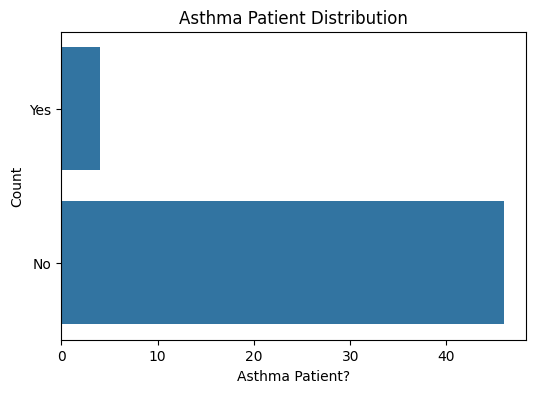

In [6]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['asthma_patient?'])
plt.title('Asthma Patient Distribution')
plt.xlabel('Asthma Patient?')
plt.ylabel('Count')
plt.show()


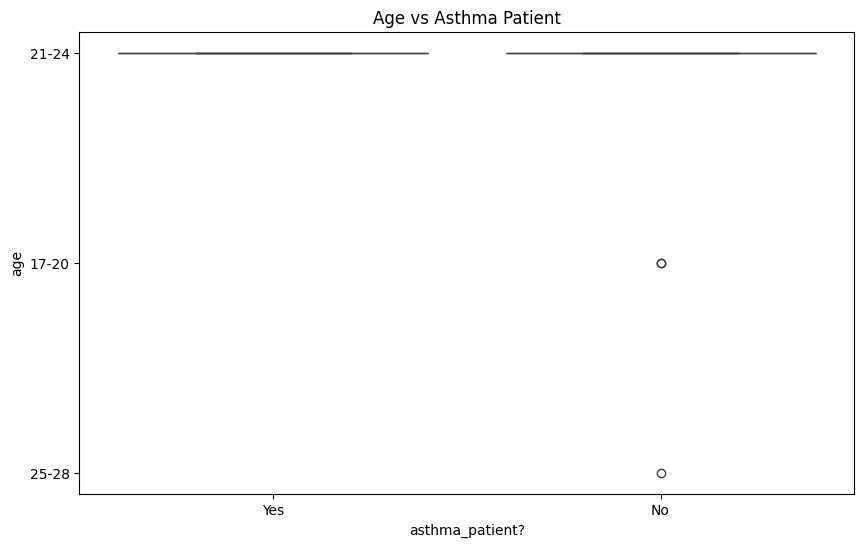

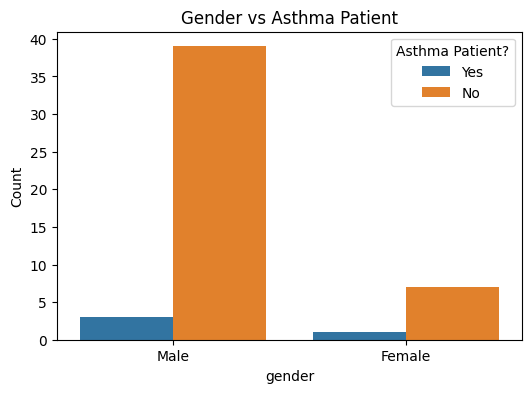

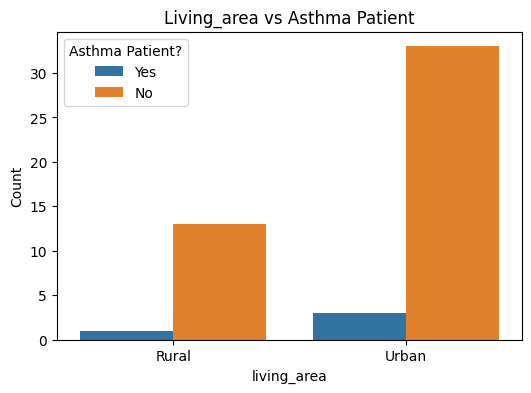

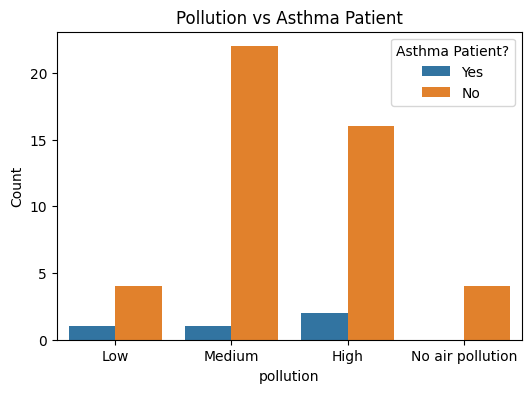

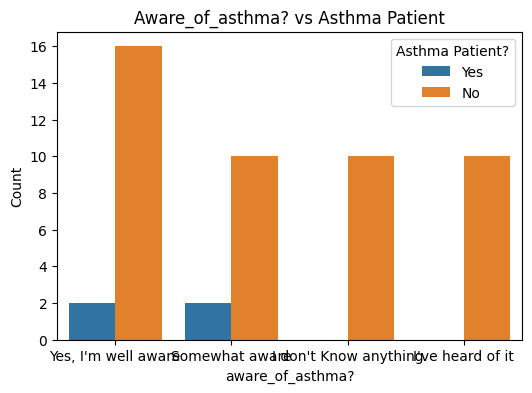

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code to load and clean the data) ...

# Analyze features against the target
plt.figure(figsize=(10, 6))
sns.boxplot(x='asthma_patient?', y='age', data=data)
plt.title('Age vs Asthma Patient')
plt.show()

# Bar plot for categorical features
categorical_features = ['gender', 'living_area', 'pollution', 'aware_of_asthma?']

for feature in categorical_features:
    # Reshape data into long format
    melted_data = data.melt(id_vars=['asthma_patient?'], value_vars=[feature],
                            var_name='Category', value_name='Value')

    # Use melted_data for countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Value', hue='asthma_patient?', data=melted_data)
    plt.title(f'{feature.capitalize()} vs Asthma Patient')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Asthma Patient?')
    plt.show()

### Preprocess Data

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
encoded_data = data.copy()
label_encoders = {}

for column in encoded_data.columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le

# Define features and target
X = encoded_data.drop(columns=['asthma_patient?'])
y = encoded_data['asthma_patient?']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression

Accuracy: 0.80

Confusion Matrix:
[[8 1]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10



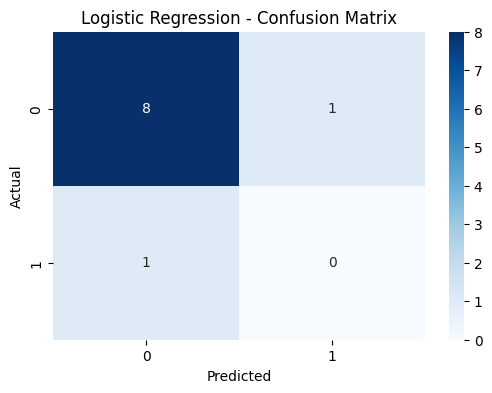

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {acc:.2f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Support Vector Machine (SVM)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90

Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



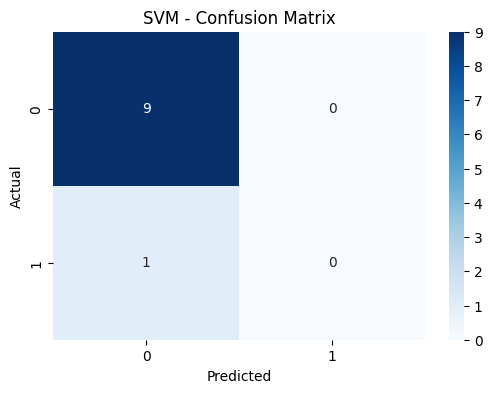

In [10]:
from sklearn.svm import SVC

# Define the SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {acc:.2f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90

Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



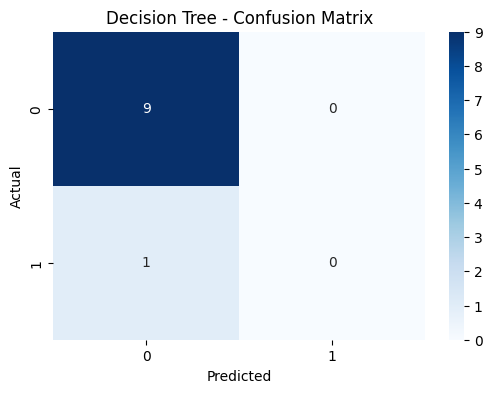

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {acc:.2f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90

Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



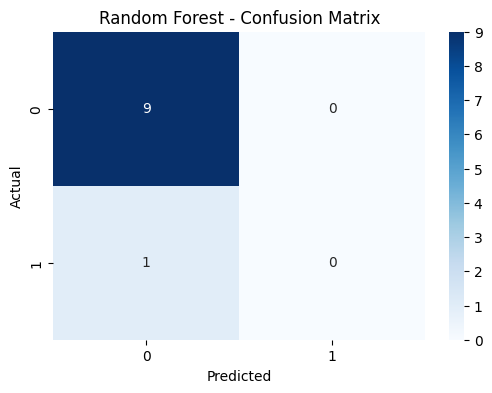

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {acc:.2f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Compare Model Performance

### Logistic Regression ###
Accuracy: 0.80

Confusion Matrix:
[[8 1]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10



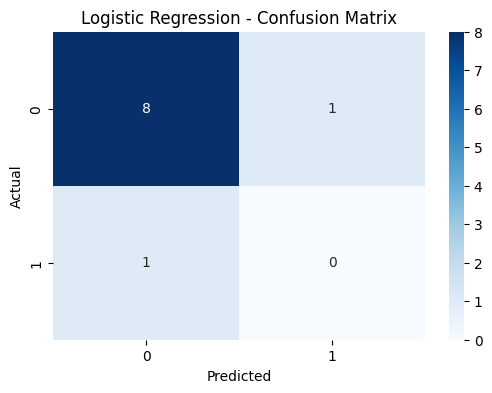

### SVM ###
Accuracy: 0.90

Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


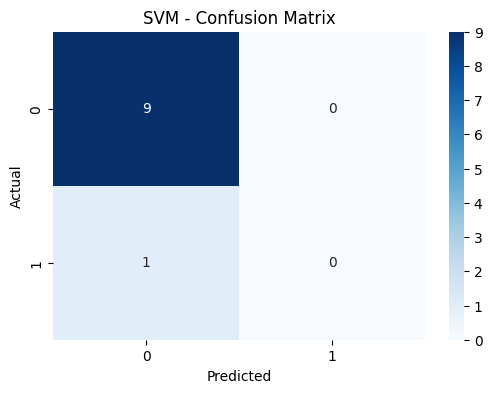

### Decision Tree ###
Accuracy: 0.90

Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


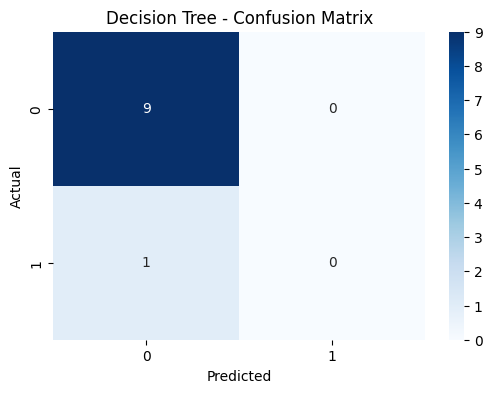

### Random Forest ###
Accuracy: 0.90

Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


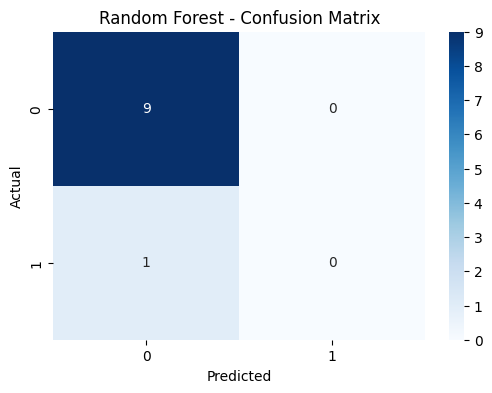


### Model Accuracies ###
Logistic Regression: 0.80
SVM: 0.90
Decision Tree: 0.90
Random Forest: 0.90


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"### {name} ###")
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Store the results
    results[name] = {
        "Accuracy": acc,
        "Confusion_Matrix": cm,
        "Classification_Report": cr
    }

    # Print metrics
    print(f"Accuracy: {acc:.2f}\n")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)

    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare accuracies
print("\n### Model Accuracies ###")
for name, metrics in results.items():
    print(f"{name}: {metrics['Accuracy']:.2f}")


Hyperparameter Tuning

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.925
Accuracy (Optimized Random Forest): 0.90
Confusion Matrix:
[[9 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


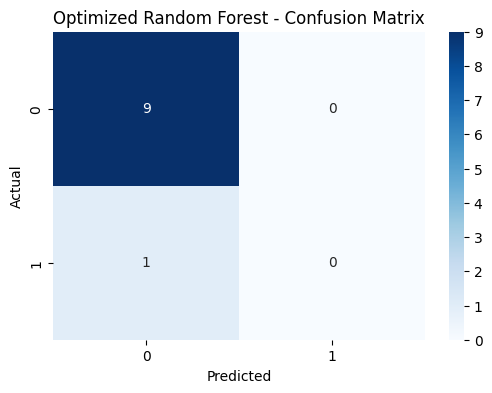

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Metrics
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
cr_best_rf = classification_report(y_test, y_pred_best_rf)

# Print metrics for the best model
print(f"Accuracy (Optimized Random Forest): {acc_best_rf:.2f}")
print("Confusion Matrix:")
print(cm_best_rf)
print("\nClassification Report:")
print(cr_best_rf)

# Visualize confusion matrix for the best model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Handle Class Imbalance

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy (SMOTE): 0.70
Confusion Matrix:
[[7 2]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.44      0.39      0.41        10
weighted avg       0.79      0.70      0.74        10



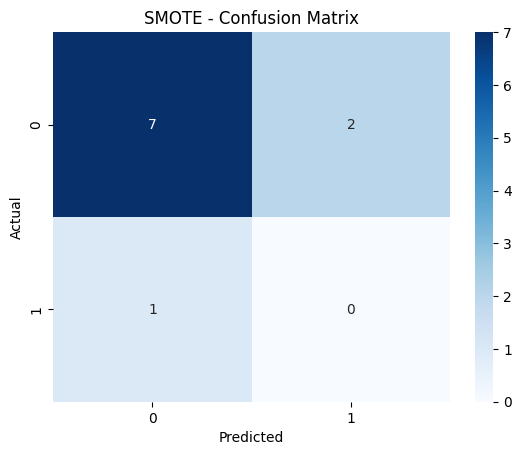

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42, k_neighbors=min(5, len(y_train[y_train == 1]) - 1)) # Adjust k_neighbors based on the minority class samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest with balanced dataset
rf_model_smote = RandomForestClassifier(
    max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42
)
rf_model_smote.fit(X_train_resampled, y_train_resampled)


# Predict on test data
y_pred_smote = rf_model_smote.predict(X_test)

# Metrics
acc_smote = accuracy_score(y_test, y_pred_smote)
cm_smote = confusion_matrix(y_test, y_pred_smote)
cr_smote = classification_report(y_test, y_pred_smote)

print(f"Accuracy (SMOTE): {acc_smote:.2f}")
print("Confusion Matrix:")
print(cm_smote)
print("\nClassification Report:")
print(cr_smote)

# Visualize confusion matrix
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title("SMOTE - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Experiment with Threshold Adjustment

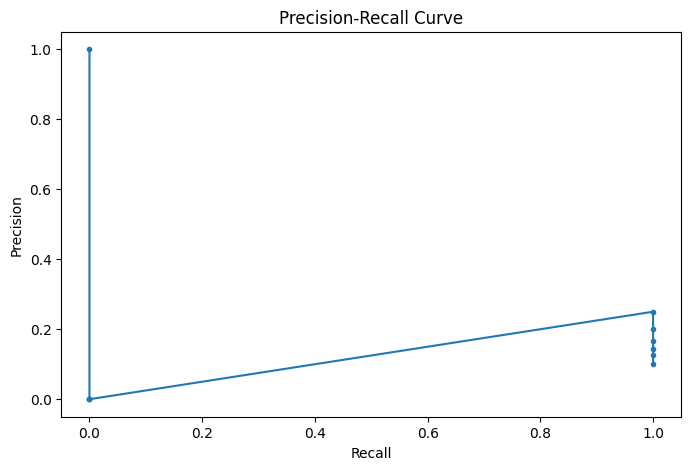

Accuracy (Adjusted Threshold): 0.60
Confusion Matrix:
[[6 3]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.43      0.33      0.38        10
weighted avg       0.77      0.60      0.68        10



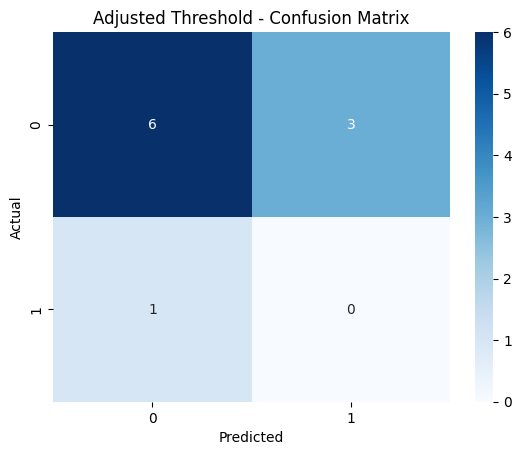

In [16]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for class 1
y_pred_prob = rf_model_smote.predict_proba(X_test)[:, 1]

# Precision-recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# Adjust the threshold
threshold = 0.3  # Example threshold
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Metrics for adjusted threshold
acc_adjusted = accuracy_score(y_test, y_pred_adjusted)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
cr_adjusted = classification_report(y_test, y_pred_adjusted)

print(f"Accuracy (Adjusted Threshold): {acc_adjusted:.2f}")
print("Confusion Matrix:")
print(cm_adjusted)
print("\nClassification Report:")
print(cr_adjusted)

# Visualize adjusted confusion matrix
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title("Adjusted Threshold - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Generating Synthetic Data for asthma_patient? = 1

In [17]:
# Filter data where asthma_patient? = 1
minority_class = data[data['asthma_patient?'] == 'Yes']  # Original dataset


Augment Data with Variations

In [18]:
# Augment data for minority class
import random

# Create synthetic samples
augmented_data = minority_class.copy()
for i in range(50):  # Generate 50 synthetic samples
    sample = minority_class.sample(1, replace=True).iloc[0].copy()  # Randomly sample one minority instance
    # Modify numerical features slightly
    if 'age' in sample:  # Example: if `age` is a numerical or ordinal feature
        sample['age'] = random.choice(['17-20', '21-24', '25-30'])  # Vary within valid ranges
    # Modify categorical features
    if 'pollution' in sample:
        sample['pollution'] = random.choice(['Low', 'Medium', 'High'])  # Add variability
    augmented_data = pd.concat([augmented_data, pd.DataFrame([sample])])

print(f"Generated {len(augmented_data) - len(minority_class)} synthetic samples.")


Generated 50 synthetic samples.


In [19]:
# Combine with the original dataset
balanced_data = pd.concat([data, augmented_data])

# Verify the new class distribution
print("New Class Distribution:")
print(balanced_data['asthma_patient?'].value_counts())


New Class Distribution:
asthma_patient?
Yes    58
No     46
Name: count, dtype: int64


Accuracy (Balanced Data): 0.95
Confusion Matrix:
[[ 9  1]
 [ 0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



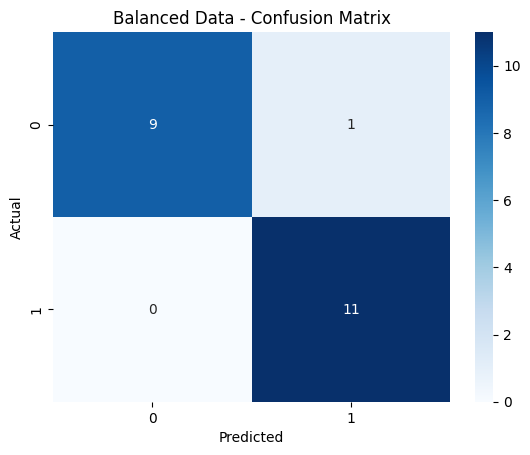

In [20]:
# Encode augmented data
encoded_balanced_data = balanced_data.copy()
for column in encoded_balanced_data.columns:
    encoded_balanced_data[column] = LabelEncoder().fit_transform(encoded_balanced_data[column])

# Split features and target
X_balanced = encoded_balanced_data.drop(columns=['asthma_patient?'])
y_balanced = encoded_balanced_data['asthma_patient?']

# Split into train and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Train Random Forest on balanced dataset
rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_balanced = rf_model_balanced.predict(X_test_balanced)
acc_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
cr_balanced = classification_report(y_test_balanced, y_pred_balanced)

print(f"Accuracy (Balanced Data): {acc_balanced:.2f}")
print("Confusion Matrix:")
print(cm_balanced)
print("\nClassification Report:")
print(cr_balanced)

# Visualize confusion matrix
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.title("Balanced Data - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
import joblib

# Save the trained model
joblib.dump(rf_model_balanced, 'optimized_asthma_model.pkl')

print("Model saved as 'optimized_asthma_model.pkl'")


Model saved as 'optimized_asthma_model.pkl'


In [22]:
from google.colab import files

# Download the model file
files.download('optimized_asthma_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ***DONE -- ITS TIME TO WORK IN HUGGING FACE***

ensure the model is sensitive enough to high-risk **profiles**

TESTING AGAIN

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data Mining/Asthma Data Collection Survey.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Display first few rows
print(data.head())

# Check class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['asthma_patient?'])
plt.title('Asthma Patient Distribution')
plt.xlabel('Asthma Patient?')
plt.ylabel('Count')
plt.show()

# Check for missing values
print("Missing values:\n", data.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data Mining/Asthma Data Collection Survey.csv'

In [ ]:
print(data['asthma_patient?'].value_counts())


asthma_patient?
No     46
Yes     4
Name: count, dtype: int64


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data for encoding
cleaned_data = data.copy()

# Standardize specific columns (e.g., 'smoke_or_tobacco_user?')
cleaned_data['smoke_or_tobacco_user?'] = cleaned_data['smoke_or_tobacco_user?'].apply(
    lambda x: 'Yes' if 'Yes' in x else 'No'
)
cleaned_data['aware_of_asthma?'] = cleaned_data['aware_of_asthma?'].apply(
    lambda x: 'Yes' if 'Yes' in x else 'No'
)

# Encode categorical variables
label_encoders = {}
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == 'object':
        le = LabelEncoder()
        cleaned_data[column] = le.fit_transform(cleaned_data[column])
        label_encoders[column] = le

# Check the cleaned data
print("Encoded data preview:")
print(cleaned_data.head())

# Check class distribution
print("Class distribution after encoding:")
print(cleaned_data['asthma_patient?'].value_counts())


Encoded data preview:
   gender  age  living_area  pollution  aware_of_asthma?  asthma_patient?  \
0       1    1            0          1                 1                1   
1       1    1            1          2                 1                1   
2       0    1            1          0                 0                0   
3       1    1            0          3                 0                0   
4       0    0            1          2                 0                0   

   allergy?  coughing_or_throat_problem_?  breathing_problem?  \
0         1                             4                   1   
1         0                             2                   2   
2         0                             3                   0   
3         1                             4                   1   
4         0                             2                   0   

   smoke_or_tobacco_user?  any_other_health_issues?  
0                       1                         0  
1               

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=3)  # Adjust k_neighbors to handle fewer samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
asthma_patient?
1    46
0    46
Name: count, dtype: int64


Accuracy: 0.89

Confusion Matrix:
[[10  1]
 [ 1  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.88      0.88      0.88         8

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19



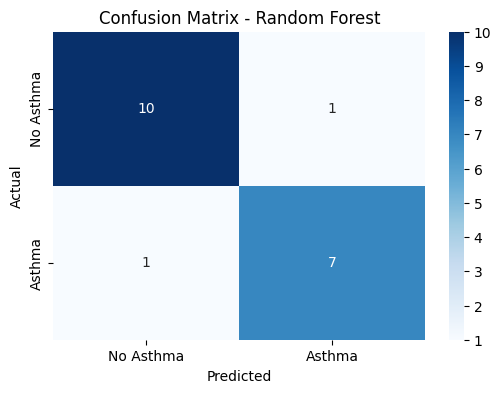

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'optimized_asthma_model.pkl')
print("Model saved as 'optimized_asthma_model.pkl'")


Model saved as 'optimized_asthma_model.pkl'


In [ ]:
# Example input (replace values with your desired test case)
sample_input = X_test.iloc[0].values.reshape(1, -1)  # First sample from the test set

# Predict
sample_prediction = rf_model.predict(sample_input)
predicted_class = "Asthma" if sample_prediction[0] == 1 else "No Asthma"

print("Sample Input:", sample_input)
print("Predicted Class:", predicted_class)


Sample Input: [[0 1 0 0 1 0 4 0 0 0]]
Predicted Class: No Asthma


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
high_risk_input = [[1, 2, 1, 2, 1, 1, 2, 2, 1, 1]]  # Adjust based on your encoding
high_risk_prediction = rf_model.predict(high_risk_input)
high_risk_class = "Asthma" if high_risk_prediction[0] == 1 else "No Asthma"
print("Predicted Class for High-Risk Profile:", high_risk_class)


Predicted Class for High-Risk Profile: No Asthma


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
sample_prob = rf_model.predict_proba(sample_input)
print("Prediction Probabilities:", sample_prob)


Prediction Probabilities: [[0.91 0.09]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Get predicted probabilities for the high-risk profile
high_risk_prob = rf_model.predict_proba(high_risk_input)[0]

# Adjust the threshold
threshold = 0.3  # Lower the threshold to improve recall for "Asthma"
predicted_class_adjusted = "Asthma" if high_risk_prob[1] >= threshold else "No Asthma"

print(f"Adjusted Threshold Prediction for High-Risk Profile: {predicted_class_adjusted}")
print(f"Adjusted Probabilities: {high_risk_prob}")


Adjusted Threshold Prediction for High-Risk Profile: No Asthma
Adjusted Probabilities: [0.73 0.27]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall',  # Focus on recall for "Asthma"
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

# Use the best model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Recall Score: 0.9714285714285715
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.67      0.75      0.71         8

    accuracy                           0.74        19
   macro avg       0.73      0.74      0.73        19
weighted avg       0.74      0.74      0.74        19



In [ ]:
# Predict again with the tuned model or adjusted threshold
tuned_prob = best_rf.predict_proba(high_risk_input)[0]
tuned_prediction = "Asthma" if tuned_prob[1] >= threshold else "No Asthma"

print(f"Tuned Prediction for High-Risk Profile: {tuned_prediction}")
print(f"Tuned Probabilities: {tuned_prob}")


Tuned Prediction for High-Risk Profile: No Asthma
Tuned Probabilities: [0.76336508 0.23663492]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Train a new model with class weighting
weighted_rf = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    n_estimators=50,
    class_weight={0: 1, 1: 3}  # Assign higher weight to class 1
)
weighted_rf.fit(X_train, y_train)

# Evaluate the weighted model
y_pred_weighted = weighted_rf.predict(X_test)
weighted_prob = weighted_rf.predict_proba(high_risk_input)[0]

print("Weighted Model Classification Report:")
print(classification_report(y_test, y_pred_weighted))
print(f"Weighted Model Prediction for High-Risk Profile: {'Asthma' if weighted_prob[1] >= 0.3 else 'No Asthma'}")
print(f"Weighted Model Probabilities: {weighted_prob}")


Weighted Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.70      0.88      0.78         8

    accuracy                           0.79        19
   macro avg       0.79      0.80      0.79        19
weighted avg       0.81      0.79      0.79        19

Weighted Model Prediction for High-Risk Profile: No Asthma
Weighted Model Probabilities: [0.70861905 0.29138095]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model with class weighting
xgb_model = XGBClassifier(
    scale_pos_weight=3,  # Adjust this based on class imbalance ratio
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(high_risk_input)[0]

print("XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost Model Prediction for High-Risk Profile: {'Asthma' if xgb_prob[1] >= 0.3 else 'No Asthma'}")
print(f"XGBoost Model Probabilities: {xgb_prob}")


XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.70      0.88      0.78         8

    accuracy                           0.79        19
   macro avg       0.79      0.80      0.79        19
weighted avg       0.81      0.79      0.79        19

XGBoost Model Prediction for High-Risk Profile: Asthma
XGBoost Model Probabilities: [0.5569334 0.4430666]


### FINALLY XGBoost Model Prediction for High-Risk Profile: **Asthma**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [3, 5, 10]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Recall Score:", grid_search_xgb.best_score_)

# Evaluate the tuned model
best_xgb = grid_search_xgb.best_estimator_
y_pred_tuned = best_xgb.predict(X_test)
print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
Best Recall Score: 1.0
Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.67      1.00      0.80         8

    accuracy                           0.79        19
   macro avg       0.83      0.82      0.79        19
weighted avg       0.86      0.79      0.79        19



## (not) FINAL ASTHMA MODEL

In [ ]:
import joblib

# Save the tuned XGBoost model
joblib.dump(best_xgb, 'final_asthma_model.pkl')
print("Model saved as 'final_asthma_model.pkl'")


Model saved as 'final_asthma_model.pkl'


Test again!!!!!

In [ ]:
import numpy as np

# Define test profiles (replace values based on encoding)
test_profiles = [
    [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],  # Low-Risk Profile
    [1, 1, 1, 2, 2, 1, 1, 1, 1, 0],  # Moderate-Risk Profile
    [1, 2, 1, 2, 1, 1, 0, 0, 1, 1]   # High-Risk Profile
]

# Predict for each profile
for i, profile in enumerate(test_profiles, start=1):
    prob = best_xgb.predict_proba([profile])[0]
    prediction = "Asthma" if prob[1] >= 0.3 else "No Asthma"
    print(f"Profile {i}:")
    print(f"Input: {profile}")
    print(f"Prediction: {prediction}")
    print(f"Probabilities: {prob}")
    print("-" * 30)


Profile 1:
Input: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]
Prediction: Asthma
Probabilities: [0.51384044 0.48615953]
------------------------------
Profile 2:
Input: [1, 1, 1, 2, 2, 1, 1, 1, 1, 0]
Prediction: Asthma
Probabilities: [0.36573392 0.6342661 ]
------------------------------
Profile 3:
Input: [1, 2, 1, 2, 1, 1, 0, 0, 1, 1]
Prediction: Asthma
Probabilities: [0.51384044 0.48615953]
------------------------------


# **decision boundary might be overly sensitive to features that correlate with "Asthma."**

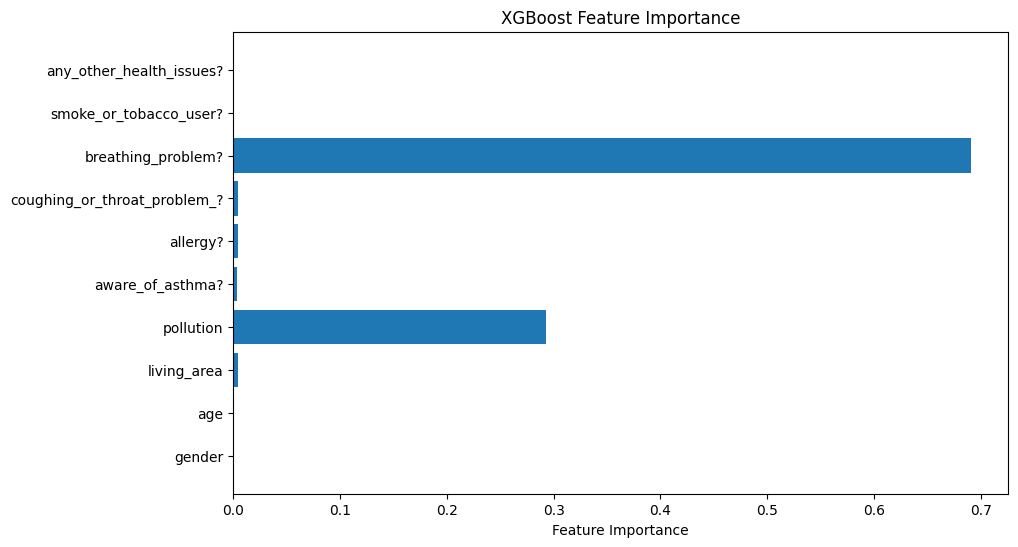

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
importance = best_xgb.feature_importances_
features = X.columns  # Replace with your feature names

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
threshold = 0.6  # Increase to prioritize more confident predictions
for i, profile in enumerate(test_profiles, start=1):
    prob = best_xgb.predict_proba([profile])[0]
    prediction = "Asthma" if prob[1] >= threshold else "No Asthma"
    print(f"Profile {i} with adjusted threshold {threshold}:")
    print(f"Prediction: {prediction}")
    print(f"Probabilities: {prob}")
    print("-" * 30)


Profile 1 with adjusted threshold 0.6:
Prediction: No Asthma
Probabilities: [0.51384044 0.48615953]
------------------------------
Profile 2 with adjusted threshold 0.6:
Prediction: Asthma
Probabilities: [0.36573392 0.6342661 ]
------------------------------
Profile 3 with adjusted threshold 0.6:
Prediction: No Asthma
Probabilities: [0.51384044 0.48615953]
------------------------------


In [ ]:
# Define criteria for low-risk and moderate-risk profiles
low_risk_criteria = (
    (cleaned_data['pollution'] == 0) &  # Low pollution
    (cleaned_data['allergy?'] == 0) &  # No allergies
    (cleaned_data['coughing_or_throat_problem_?'] >= 2)  # Infrequent coughing
)

moderate_risk_criteria = (
    (cleaned_data['pollution'] == 1) &  # Medium pollution
    (cleaned_data['allergy?'] == 1) &  # Allergies present
    (cleaned_data['coughing_or_throat_problem_?'] == 3)  # Sometimes coughing
)

# Filter the dataset
filtered_data = cleaned_data[low_risk_criteria | moderate_risk_criteria]

# Check the class distribution
print("Filtered Class Distribution:")
print(filtered_data['asthma_patient?'].value_counts())


Filtered Class Distribution:
asthma_patient?
0    6
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the filtered data
encoded_filtered_data = filtered_data.copy()

# Encode categorical variables
label_encoders = {}
for column in encoded_filtered_data.columns:
    if encoded_filtered_data[column].dtype == 'object':
        le = LabelEncoder()
        encoded_filtered_data[column] = le.fit_transform(encoded_filtered_data[column])
        label_encoders[column] = le

# Define features and target
X_filtered = encoded_filtered_data.drop(columns=['asthma_patient?'])
y_filtered = encoded_filtered_data['asthma_patient?']


In [ ]:
# Expand moderate-risk criteria to include more diversity
moderate_risk_criteria = (
    (cleaned_data['pollution'] <= 1) &  # Low or medium pollution
    (cleaned_data['allergy?'] == 1) &  # Allergies present
    (cleaned_data['coughing_or_throat_problem_?'] >= 2) &  # Sometimes or often coughing
    (cleaned_data['asthma_patient?'] == 1)  # Must include asthma cases
)

# Combine low-risk and expanded moderate-risk criteria
filtered_data = cleaned_data[low_risk_criteria | moderate_risk_criteria]

# Check the updated class distribution
print("Updated Filtered Class Distribution:")
print(filtered_data['asthma_patient?'].value_counts())


Updated Filtered Class Distribution:
asthma_patient?
0    6
1    2
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Define features and target
X_filtered = filtered_data.drop(columns=['asthma_patient?'])
y_filtered = filtered_data['asthma_patient?']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1 due to limited samples in class 1
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
asthma_patient?
1    6
0    6
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 1.00

Confusion Matrix:
[[3]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



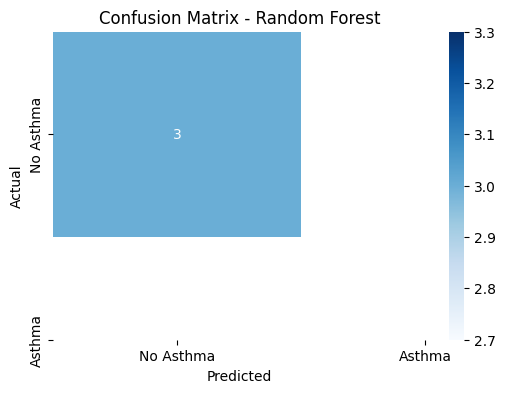

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Define test profiles (replace values with your desired test cases)
low_risk_input = [[0, 0, 0, 0, 0, 0, 3, 0, 0, 0]]  # Example low-risk profile
moderate_risk_input = [[1, 1, 1, 1, 1, 1, 3, 1, 1, 0]]  # Example moderate-risk profile

# Predict for low-risk profile
low_risk_prob = rf_model.predict_proba(low_risk_input)[0]
low_risk_pred = "Asthma" if low_risk_prob[1] >= 0.5 else "No Asthma"
print("Low-Risk Profile Prediction:")
print(f"Prediction: {low_risk_pred}, Probabilities: {low_risk_prob}")

# Predict for moderate-risk profile
moderate_risk_prob = rf_model.predict_proba(moderate_risk_input)[0]
moderate_risk_pred = "Asthma" if moderate_risk_prob[1] >= 0.5 else "No Asthma"
print("Moderate-Risk Profile Prediction:")
print(f"Prediction: {moderate_risk_pred}, Probabilities: {moderate_risk_prob}")


Low-Risk Profile Prediction:
Prediction: No Asthma, Probabilities: [1. 0.]
Moderate-Risk Profile Prediction:
Prediction: Asthma, Probabilities: [0.49 0.51]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Add feature names to test inputs
low_risk_input_named = pd.DataFrame(low_risk_input, columns=X_resampled.columns)
moderate_risk_input_named = pd.DataFrame(moderate_risk_input, columns=X_resampled.columns)

# Predict for low-risk profile
low_risk_prob_named = rf_model.predict_proba(low_risk_input_named)[0]
low_risk_pred_named = "Asthma" if low_risk_prob_named[1] >= 0.5 else "No Asthma"
print("Low-Risk Profile Prediction (With Names):")
print(f"Prediction: {low_risk_pred_named}, Probabilities: {low_risk_prob_named}")

# Predict for moderate-risk profile
moderate_risk_prob_named = rf_model.predict_proba(moderate_risk_input_named)[0]
moderate_risk_pred_named = "Asthma" if moderate_risk_prob_named[1] >= 0.5 else "No Asthma"
print("Moderate-Risk Profile Prediction (With Names):")
print(f"Prediction: {moderate_risk_pred_named}, Probabilities: {moderate_risk_prob_named}")


Low-Risk Profile Prediction (With Names):
Prediction: No Asthma, Probabilities: [1. 0.]
Moderate-Risk Profile Prediction (With Names):
Prediction: Asthma, Probabilities: [0.49 0.51]


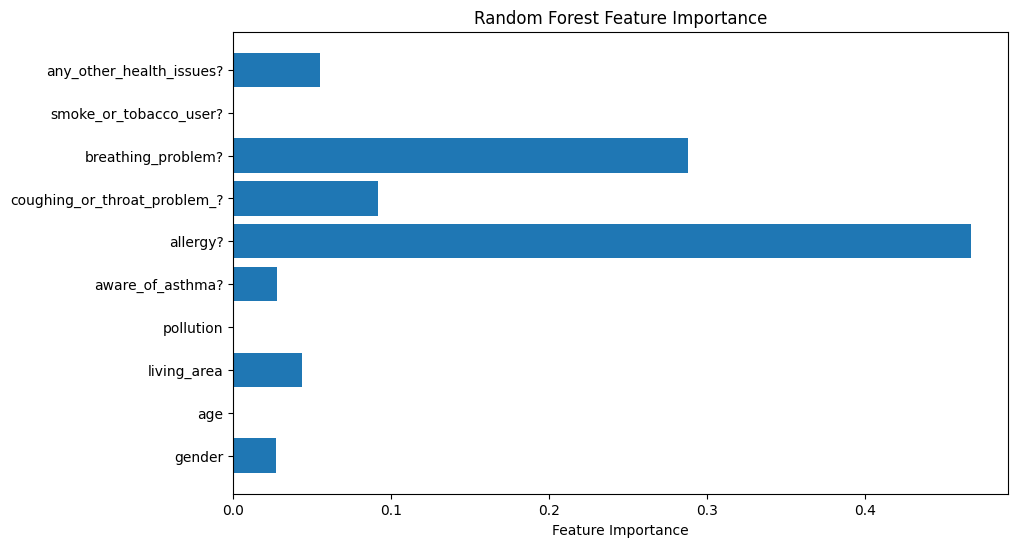

In [ ]:
# Plot feature importance
importance = rf_model.feature_importances_
features = X_resampled.columns  # Feature names

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'low_moderate_asthma_model.pkl')

print("Model saved as 'low_moderate_asthma_model.pkl'")


Model saved as 'low_moderate_asthma_model.pkl'


In [ ]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('low_moderate_asthma_model.pkl')

# Define test profiles (use meaningful encoded values)
# Replace values with realistic test cases based on your data encoding
low_risk_input = [[0, 0, 0, 0, 0, 0, 3, 0, 0, 0]]  # Example low-risk profile
moderate_risk_input = [[1, 1, 1, 1, 1, 1, 3, 1, 1, 0]]  # Example moderate-risk profile

# Test Low-Risk Profile
low_risk_prob = loaded_model.predict_proba(low_risk_input)[0]
low_risk_pred = "Asthma" if low_risk_prob[1] >= 0.5 else "No Asthma"
print("Low-Risk Profile Test:")
print(f"Prediction: {low_risk_pred}, Probabilities: {low_risk_prob}")

# Test Moderate-Risk Profile
moderate_risk_prob = loaded_model.predict_proba(moderate_risk_input)[0]
moderate_risk_pred = "Asthma" if moderate_risk_prob[1] >= 0.5 else "No Asthma"
print("Moderate-Risk Profile Test:")
print(f"Prediction: {moderate_risk_pred}, Probabilities: {moderate_risk_prob}")


Low-Risk Profile Test:
Prediction: No Asthma, Probabilities: [1. 0.]
Moderate-Risk Profile Test:
Prediction: Asthma, Probabilities: [0.49 0.51]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Downloading

In [ ]:
from google.colab import files

# Download the model file
files.download('low_moderate_asthma_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>